In [1]:
!pip install cartopy
!pip install geopandas

# Chapter 7.2 - Mapping Geoscience Data

In Chapter 5, we introduced plotting methods in Python via ```matplotlib```. We explored basic plotting with line graphs, bar graphs, etc. We learned about how we could use Python ```list``` and ```numpy.ndarray``` to create coordinates and pass those coordinates to the ```matplotlib``` interface. This approach to plotting is useful for simple, cartesian coordinates that assume equidistant spacing by default. This approach can also be used to transform the coordinates into [log coordinates](https://en.wikipedia.org/wiki/Logarithm).

Geoscience data often represent points, boundaries, or areas on Earth. At first glance, you might think that there is not much of a difference between simple cartesian coordinates and geographic coordinates like latitude and longitude. However, the study of Geography includes learning techniques that can handle working with geographic coordinates and plotting data associated with geographic coordinates.

Geographers and cartographers use [map projections](https://en.wikipedia.org/wiki/Map_projection) to handle an important consideration--our planet is an [oblate spheroid](https://simple.wikipedia.org/wiki/Oblate_spheroid), not a flat 2D surface. Consider the 3D plot below of a sphere (from: https://matplotlib.org/stable/gallery/mplot3d/surface3d_2.html). How would you transform the surface of this sphere to a map (i.e., a flat 2D surface)?

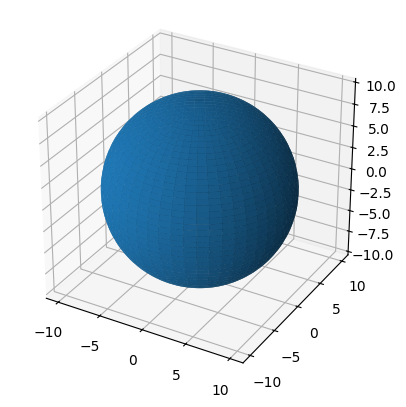

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z)

# Set an equal aspect ratio
ax.set_aspect('equal')

### Chapter 7.2.1 - Map Projections

Map projections are mathematical relationships that transform "real" coordinates on our planet to virtual coordinates on a map. The first thing to recognize about this transformation is that **no coordinate system is perfect and without distortion**. Every coordinate system has a compromise that reduces distortion for one of the following considerations:

1. ```equal-area``` - represents a conditionally accurate representation of "real world" area.
2. ```azimuthal``` - represents a conditionally accurate representation of directions between points.
3. ```conformal``` - represents a conditionally accurate representation of shapes.
4. ```equidistant``` - represents a conditionally accurate representation of distance.

One way to represent the magnitude and character of the distortion is a [Tissot map](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix). Below is an example of distortions associated with the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection). This projection was widely used by the 18th century because of its usefulness in navigating oceans. However, it has *significant* distortions in area. On a mercator map, "real" area in the tropics is represented well. However, areal distortion *significantly* increases as you go towards the north and south pole. This is an example of a compromise and utility--it is good for navigation, but not good for representing accurate "real" area. The practical result of this is that Greenland represents a relative map area that is far, far larger than its relative "real world" area. Africa is actually 14x larger than Greenland!

![tissot](https://upload.wikimedia.org/wikipedia/commons/8/87/Tissot_mercator.png)

**Scale**

The first, and potentially most obvious compromise is that maps are **much smaller** than the area they represent. If following the best practices in [cartography](https://en.wikipedia.org/wiki/Cartography), the most fundamental item to include on a map is a map scale. The map scale helps quickly communicate the ratio between real distances and map distances. For example, your map might have a 50000:1 ratio, where 1 centimeter is equal to 500 meters. This may seem like an obvious, implicit characteristic of maps, but it is very important to communicate. For example, if you are plotting radar data on a map of [mesoscale](https://en.wikipedia.org/wiki/Mesoscale_meteorology) objects, the map reader should see a map scale that communicates map distances of 10 - 100 km. Below is an example of a map scale that shows map distance conversions in miles and kilometers.

*Think about: when creating a map scale like the one below, can you copy and paste it on an image and resize it until it "looks good"? Why or why not?*

![map_scale](https://upload.wikimedia.org/wikipedia/commons/d/dc/Map_scale_-_8km%2C_5mi.png)


**Distortions**

The less obvious compromise is that associated with **distortion**. Distortions are related to how accurate the scale is at different locations on the map. In other words, a map with low distortion will maintain the communicated scale throughout the map (usually with some small variance). A map with high distortion could render the scale calculation virtually useless as the ratio becomes highly variable from place to place.

Compare the Mercator projection above to the [Gall-Peters projection](https://en.wikipedia.org/wiki/Gall%E2%80%93Peters_projection) below. This [equal-area projection](https://en.wikipedia.org/wiki/Equal-area_projection) preserves the area for all ovals at the expense of shape. In other words, the ovals can look streched out or squished, but this is required to maintain "real world" area on the map. What you might notice about the Mercator map above is that it preserves the shape of the ovals everywhere on the map, which is a property of a [conformal projection](https://en.wikipedia.org/wiki/Conformal_map_projection)

![gall-peters](https://upload.wikimedia.org/wikipedia/commons/e/e7/Tissot_indicatrix_world_map_Gall-Peters_equal-area_proj.svg)

You can also have a compromise that tries to combine aspects of both conformal and equal-area projections. The result is a reduction in both area and shape distortions (relative to lat/lon grids), but more distortion in shape than a pure conformal or more distortion in area than an equal-area projection. One example is the Equal Earth Projection.

**Types of Projection Surfaces**

As the name projection suggests, the Earth's surface is flattened onto one of three shapes. In all cases, a line from the Earth's center (or however that is defined) and any surface coordinate is extended out from the Earth's surface. Where this line intersects with the projection shape is the "projected coordinate". The shapes can have different orientations, different origins, etc., which all modify where the line intersects with the projection surface. The three types of projection surfaces include:

1. *cylindrical projection* - good for coordinates near the equator or wherever the cylinder "touches" Earth's surface. As the coordinate distance from the cylinder surface increases, the amount of distortion increases substantially. Distortion does not increase longitudinally (E or W).

2. *conical projection* - good for coordinates in one hemisphere and particularly near the latitude of intersection. Distortion increases towards the center of the cone and away from the intersection latitude modestly, but increases significantly as you move away from the cone's center. These types of projections are preferred for maps of the United States. Distortion does not increase longitudinally (E or W)

3. *azimuthal projection* - projection onto a virtual flat circle, typically used for polar coordinates. Distortion is small near the intersection of Earth's surface and the projection surface, but increases substantially in all directions.

![shapes](https://upload.wikimedia.org/wikipedia/commons/c/c1/Comparison_of_cartography_surface_development.svg)

In summary, regional to global areas will always include some distortion. The choice of projection is based mainly on the application. Some good first choice projections include:

1. You want areas to be consistent throughout a continental-scale map: ```albers equal-area conic```
2. You want shapes to be consistent throughout a continental-scale map: ```lambert conformal conic```
3. You want a global map with reduced shape and area distortion: ```equal earth```
4. You want a convenient way to store geographic data in a "universal" coordinate system: ```latitude / longitude```





### Chapter 7.2.2 - ```cartopy```

Cartopy is a convenient mapping package that handles both projection processing and mapping. This package essentially extends the ```matplotlib``` package to include the ability to display geospatial information (kind of like ```geopandas``` and ```pandas```).

The most basic map you can create only requires a few lines. There are two major subpackages you need to import when making a cartopy map:

1. ```import cartopy.crs as ccrs```: ccrs handles all of the projection duties

2. ```import cartopy.feature as cfeature```: cfeature handles convenient methods to plot common boundaries (US States, etc.).

These two imports will be included in most, if not all, of your code that involves cartopy mapping.

**Matplotlib axes**

One extra aspect of matplotlib that we did not discuss in previous chapters is the ```axes``` objects and methods that provide a high level of customization. Once you create the axes object, the rest of the methods are the same or very similar to what you practiced.

Here is how you create 1 axes object and plot data.

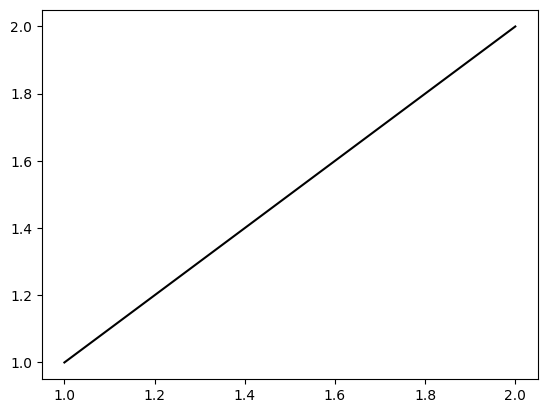

In [3]:
import matplotlib.pyplot as plt

ax = plt.subplot(1, 1, 1)

ax.plot([1, 2], [1, 2], 'k-')

Notice that you use ```ax.plot``` instead of ```plt.plot```. Otherwise, everything is the same. What is nice about the ```axes``` object is you can create multiple subplots on the same graph.

Here is how you create two stacked subplots:

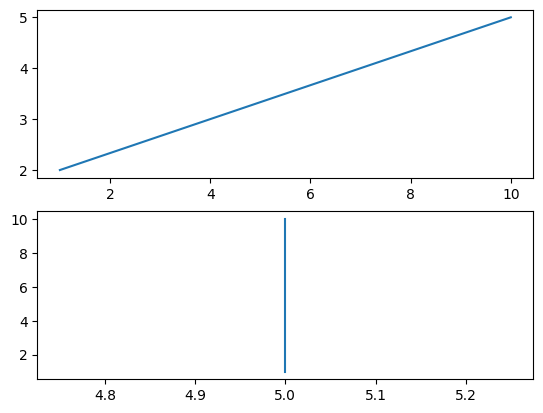

In [4]:
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.plot([1, 10], [2, 5])

ax2.plot([5, 5], [10, 1])

Here is how you create two side-by-side subplots:

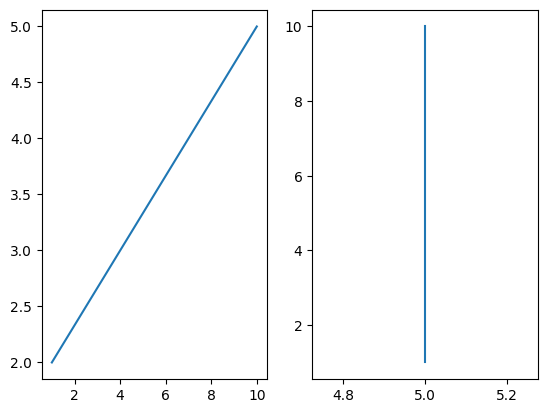

In [5]:
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.plot([1, 10], [2, 5])

ax2.plot([5, 5], [10, 1])

The general pattern of plt.subplot is:

```plt.subplot(num_of_rows, num_of_columns, axes_number)```

Where ```axes_number``` is the ordered index (starting with 1) of axes starting from left to right and then up to down (like reading a book).

This can be demonstrated with a 2x2 plot. ```plt.tight_layout()``` can be used to enforce visually-appealing spacing between the axes. ```ax.set_title``` is the same as ```plt.title```, except you can customize it for each axes.

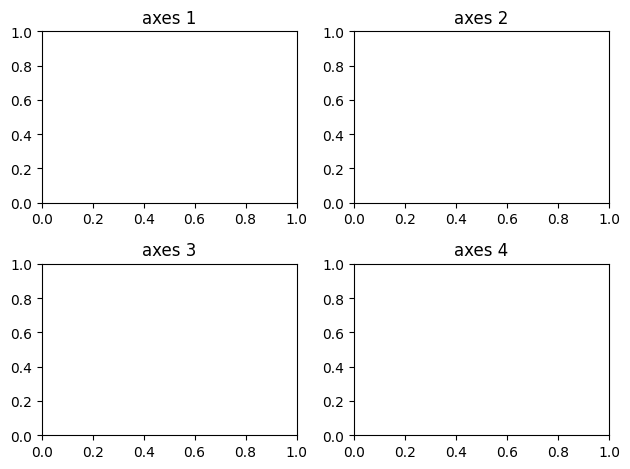

In [6]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

ax1.set_title("axes 1")
ax2.set_title("axes 2")
ax3.set_title("axes 3")
ax4.set_title("axes 4")

plt.tight_layout()

**Cartopy axes**

Cartopy axes behave in exactly the same way, but require a few extra lines of code:

Text(0.5, 1.0, 'Cartopy ax')

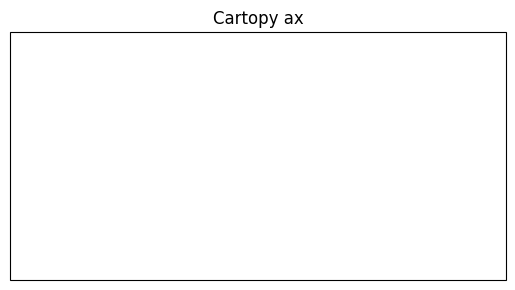

In [7]:
import cartopy.crs as ccrs

import cartopy.feature as cfeature

#1x1 subplot, first axis
#give it a PlateCarree projection (lat/lon)
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_title("Cartopy ax")

This does not seem that different than the basic matplotlib version until you add geographic information with [```cfeature```](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html).

This subpackage includes common shapefiles like:

1. Country borders - ```cfeature.BORDERS```
2. Coastlines - ```cfeature.COASTLINE```
3. Lakes - ```cfeature.LAKES```
4. Land - ```cfeature.LAND```
5. Ocean - ```cfeature.OCEAN```
6. US States - ```cfeature.STATES```

These geography features are added to the map using ```ax.add_feature```. For example, you can combine the BORDERS and COASTLINE features to get a nice world map:

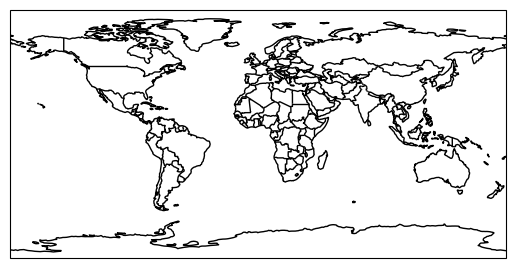

In [8]:
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

The cartopy axes (```geoaxes```) have many useful methods including ```set_extent```, which, in colloquiual map terms, has a pattern of:

```ax.set_extent([leftmost_coordinate, rightmost_coordinate, lowest_coordinate, highest_coordinate])```

We can demonstrate this on the world map above:

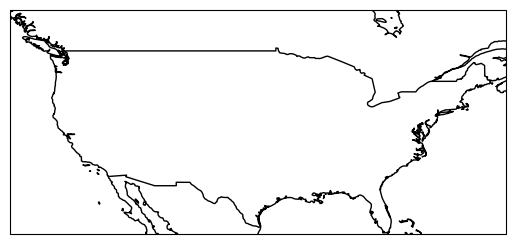

In [9]:
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130, -65, 25, 50])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

We can add STATES to the map by adding one more line of code:

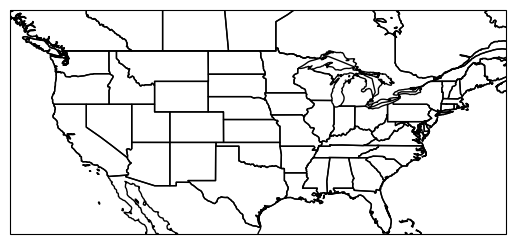

In [10]:
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-130, -65, 25, 50])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

**Cartopy projections**

The maps you have seen thus far are typical "lat/lon" maps. You know you are seeing lat/lon maps when the US/Canadian border is flat. This is because the border is along the [49th parallel North](https://en.wikipedia.org/wiki/49th_parallel_north) from North Dakota to Washington. In other words, the border is being drawn along the same latitude (y coordinate) at many longitudes (x coordinate). If this is flat, you know your coordinate system is in lat/lon.

Alternatively, you can use equal area, conformal, and conic projections for the United States to reduce distortions. For example, we can use ```LambertConformal`` to preserve state shapes. You may have to adjust the extent when changing projections due to how cartopy handles the mapping domain and map aspect ratio. The map below is a nice template to use when plotting data in the CONUS.

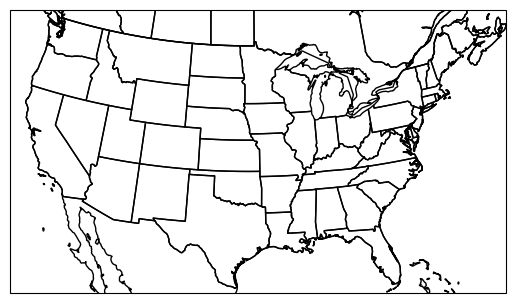

In [11]:
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.set_extent([-120, -70, 22.5, 50])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

If we want the shapes to maintain their area, we can use AlbersEqualArea. However, we note that the default settings make a sideways map!

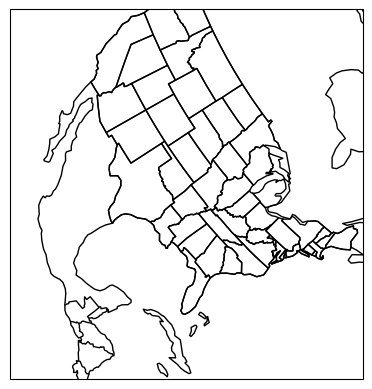

In [12]:
ax = plt.subplot(1, 1, 1, projection=ccrs.AlbersEqualArea())
ax.set_extent([-120, -70, 22.5, 50])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

We can identify the potential problem by using the ```help``` function. We see that the central latitude and central longitude are set to 0, 0.

In [13]:
help(ccrs.AlbersEqualArea())

Help on AlbersEqualArea in module cartopy.crs object:

class AlbersEqualArea(Projection)
 |  AlbersEqualArea(central_longitude=0.0, central_latitude=0.0, false_easting=0.0, false_northing=0.0, standard_parallels=(20.0, 50.0), globe=None)
 |
 |  An Albers Equal Area projection
 |
 |  This projection is conic and equal-area, and is commonly used for maps of
 |  the conterminous United States.
 |
 |  Method resolution order:
 |      AlbersEqualArea
 |      Projection
 |      CRS
 |      pyproj.crs.crs.CustomConstructorCRS
 |      pyproj.crs.crs.CRS
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, central_longitude=0.0, central_latitude=0.0, false_easting=0.0, false_northing=0.0, standard_parallels=(20.0, 50.0), globe=None)
 |      Parameters
 |      ----------
 |      central_longitude: optional
 |          The central longitude. Defaults to 0.
 |      central_latitude: optional
 |          The central latitude. Defaults to 0.
 |      false_easting: optional
 |  

If we zoom out, we can start to understand how this projection works. The center of the map in the N/S direction will be at ```central_longitude``` and the center of the mapped area will be at ```central_latitude```.

If we modify those parameters in ```ccrs.AlbersEqualArea```, we can make the projection US-centered.

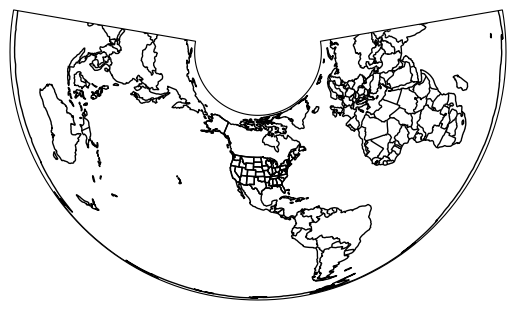

In [14]:
ax = plt.subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-100, central_latitude=35))
#ax.set_extent([-120, -70, 22.5, 50])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

Reintroducing ```set_extent``` will reveal a nice, equal-area map of the CONUS. You may have to adjust the settings slightly for visual correctness.

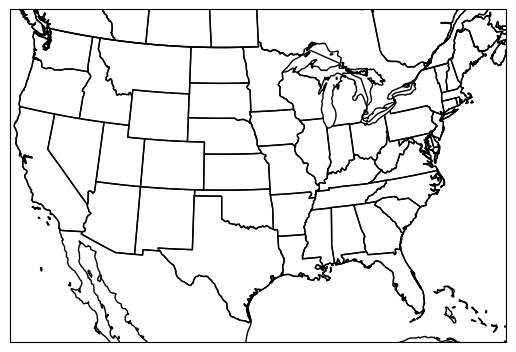

In [15]:
ax = plt.subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-100, central_latitude=35))
ax.set_extent([-120, -73, 22.5, 50])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

**Your turn**

Get into groups and zoom your extent to Illinois. Make Illinois straight "up and down" on your map by changing the projection parameters to focus on the center of Illinois.

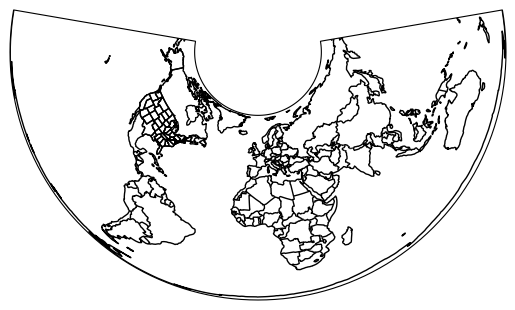

In [16]:
ax = plt.subplot(1, 1, 1, projection=ccrs.AlbersEqualArea())

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

**Secant projection intersections**

You can further reduce distortions in your projection by producing a projection surface that intersects with Earth's surface twice at constant latitude bands. This requires setting the arguments ```standard_parallels```. By default, this is set to 20 N and 50 N which covers the CONUS. The advantage to this is that your scale distortion is minimized near two latitude bands instead of one. It might be useful to reduce the range if your map is zoomed into an area between 20 N and 50 N, as this would give you reduced distortion within your mapped region instead of to the North and/or South.

In the example below, I modify the default standard parallels to instead include 30 and 35 N. This causes small, but noticable changes in the shape of states.

Text(0.5, 1.0, 'standard_parallels=(30, 35)')

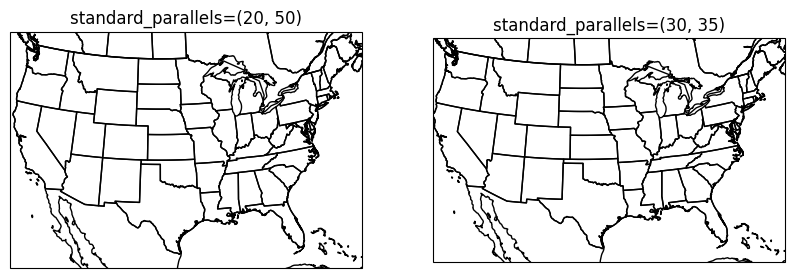

In [17]:
plt.rcParams['figure.figsize'] = 10, 10

ax1 = plt.subplot(1, 2, 1, projection=ccrs.AlbersEqualArea(central_longitude=-100, central_latitude=35, standard_parallels=(20, 50)))
ax1.set_extent([-120, -73, 22.5, 50])
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.STATES)
ax1.set_title("standard_parallels=(20, 50)")

ax2 = plt.subplot(1, 2, 2, projection=ccrs.AlbersEqualArea(central_longitude=-100, central_latitude=35, standard_parallels=(30, 35)))
ax2.set_extent([-120, -73, 22.5, 50])
ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.STATES)
ax2.set_title("standard_parallels=(30, 35)")

**Your turn**

Make a set of maps that provide "ready to rock" templates that you can use for your group project. For example, if your project compares Texas and Illinois for tornado hazards, you might want to create a custom fine-tuned map for each state. Add a title to each axes to make sure you can come back later and use these for your project. In addition, use good variable names and provide in-code comments to assist your future self.

### Chapter 7.2.3 - Plotting data with cartopy

Now that we are comfortable with making basemaps, we can practice plotting real data on our maps.

The most important thing to remember is that sometimes our geospatial data will come with different geographic coordinate systems and/or projections. We are very familiar with latitude and longitude, but we may be less familiar with [```easting and northing```](https://en.wikipedia.org/wiki/Projected_coordinate_system#Easting_and_northing). Technically, the latitude / longitude system that we use has well-defined (and widely used) parameters for central longitude and central latitude. The origin (0,0) of this coordinate system is on the non-existant [null island](https://en.wikipedia.org/wiki/Null_Island) just off the coast of equatorial Africa. Another name for the central latitude is "the equator" and for central longitude, it is the "prime meridan" in this system. If we wanted to, we could set the prime meridan to run through DeKalb, IL. We just would not be able to "speak the language" of the typical latitude / longitude system. Notice if I place a "tornado" at the coordinate (-88, 40) in the modified coordinate system below, it does not show up near DeKalb.

**Your turn**

Change the ```ax.plot``` parameters so that the red star is over/near DeKalb, IL. You might have to do a few trial/error runs. Were the results surprising? Why or why not?

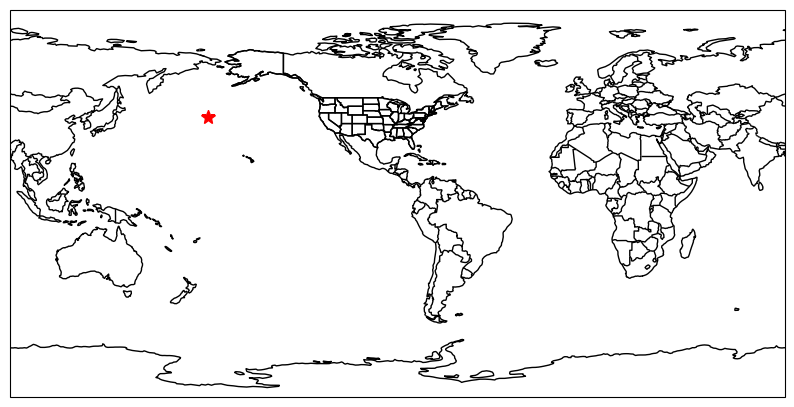

In [18]:
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-88))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

ax.plot(-88, 40, 'r*', ms=10)

**The ```transform``` parameter**

At this point, you might be asking "Am I really going to have to change the data projection and map projection every time I tweak the map?" The answer is "you can if you want", but it is probably much easier to let cartopy handle this issue.

Another extention to ```matplotlib``` functions is the ```transform``` parameter in plotting calls. This allows you to **define the projection of the geoscience data** and let ```cartopy``` figure out how to properly project the information to your map.

In the example above, we recognize that the coordinate is in our "typical" lat/lon coordinate system, but our map adjusted the system so that DeKalb, IL is at 0 longitude. If we tell cartopy that the data are in "normal lat/lon" (which is the case 90% of the time), we can properly plot this on the map without having to do the coordinate conversions ourselves!

The lat/lon coordinate system in cartopy can be accessed by using the default ```ccrs.PlateCarree()``` parameters. We see after adding this parameter, the star shows up right where we expect!

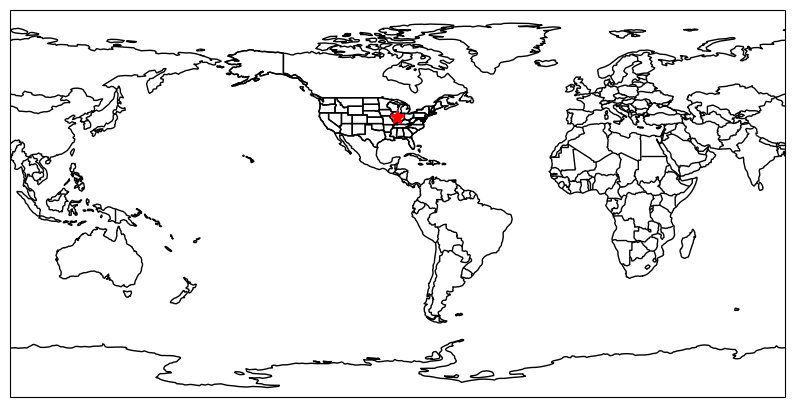

In [19]:
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-88))
ax.set_extent([-180, 180, -90, 90])

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

ax.plot(-88, 40, 'r*', ms=10, transform=ccrs.PlateCarree())

While that example is pretty silly and unlikely to be something you experience often at your job or during research, a more useful and common application of this is when you have lat/lon coordinates and projected mapping coordinates.

In a projected system, the coordinates are described as:

1. ```easting```: distance in meters east of the origin
2. ```northing```: distance in meters north of the origin

Extrapolating these definitions, if you are south of the origin, your northing meters will be negative. If you are west of the origin, your easting units will be negative. It may be surprising to hear that this is very similar to how latitude and longitude are encoded--specifically, latitude (by default) is how many degrees the location is away from the equator, whereas longitude is how many degrees the location is away from the prime meridian.

This distinction is important when considering measuring distances and areas--for example, if you have two lat/long coordinates that are 0.01 degrees apart, this can be approximated as about 1 km. However this distance is actually the rise/run distance of how the "degrees from prime meridian" and "degrees from equator" changes on a spherical surface. Nearby coordinates have relatively similar degree-to-meter conversions. However, rise/run differences in the W-to-E component are constant in degrees, but actually shrink in meters at regional to continental scales ("real world" distances). In other words, the map scale is only constant in the N/S direction.

**Real world applications**

[Strader et al. (2016)](https://doi.org/10.1002/met.1552) demonstrated that random spatial sampling of lat/lon tornado points using a monte carlo technique resulted in a spatial frequency bias--specifically, if you incorrectly assume constant "real world" distance between lat/lon points, the northern edges of your sampling region will actually have more "samples per area" than the southern areas. We can actually demonstrate this with a basic random sampling experiment.

**Your turn**

Modify the N samples and the projections in ```ax1``` and ```ax2``` to see how the frequency bias manifests only when moving from ```PlateCaree``` to a projected coordinate system and in different regions. What mapped regions have the most noticable clustering in the projected coordinate system? At what ```N``` do you begin to really notice the clustering? Why do you think this is?

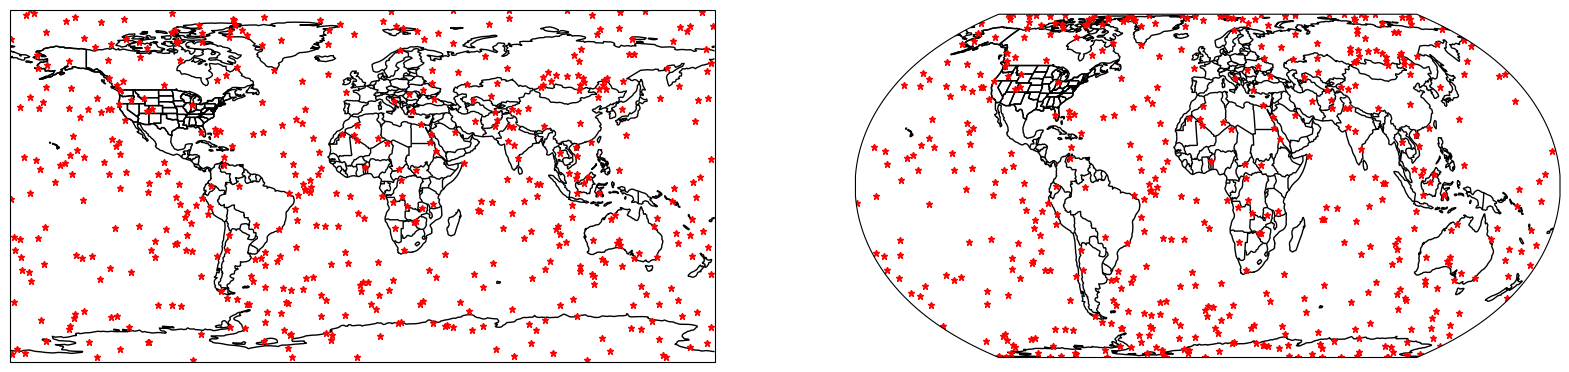

In [20]:
plt.rcParams['figure.figsize'] = 20, 20

import numpy as np

N = 500
lons = np.random.uniform(-180.0, 180.0, size=N)
lats = np.random.uniform(-90, 90, size=N)

latlon = ccrs.PlateCarree()
proj = ccrs.EqualEarth()

ax1 = plt.subplot(1, 2, 1, projection=latlon)
ax1.set_extent([-180, 180, -90, 90])

ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.STATES)

ax1.plot(lons, lats, 'r*', ms=5, transform=latlon)

ax2 = plt.subplot(1, 2, 2, projection=proj)
ax2. set_extent([-180, 180, -90, 90])

ax2.add_feature(cfeature.BORDERS)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.STATES)

ax2.plot(lons, lats, 'r*', ms=5, transform=latlon)

**Ran but failed**

There are some situations where the projection transformation does not occur, but you still get "output". This is because cartopy will naively treat lat/lon coordinates as easting/northing coordinates. Thus, if you do not to the transform properly, you might see something like this.

On this map, the projection is AlbersEqualArea that is centered on the US. In other words, the easting/northing origin is somewhere in the central US. Those coordinates (0, 0) are legitimate coordinates. So are (-88, 40)! But, since the origin is shifted **and** the units are different, this is saying that you want to plot a point 88 meters to the west and 40 meters to the north of the origin. Usually, this is **not** what you want! However, the plot will work and you will be confused. In cases where this places the coordinate off the map, it is always a good idea to "zoom out" and search for the coordinates. This could give you a better idea as to what went wrong.

**Your turn**

Manually modify the coordinate in ```ax.plot``` until is is near DeKalb, IL. Use the [Google Maps](https://www.google.com/maps) measuring tool to see if the implied distance in km from the origin (center of KS/NE border; $\sqrt{easting^2+northing^2} / 1000 $) is similar to what is reported on google.

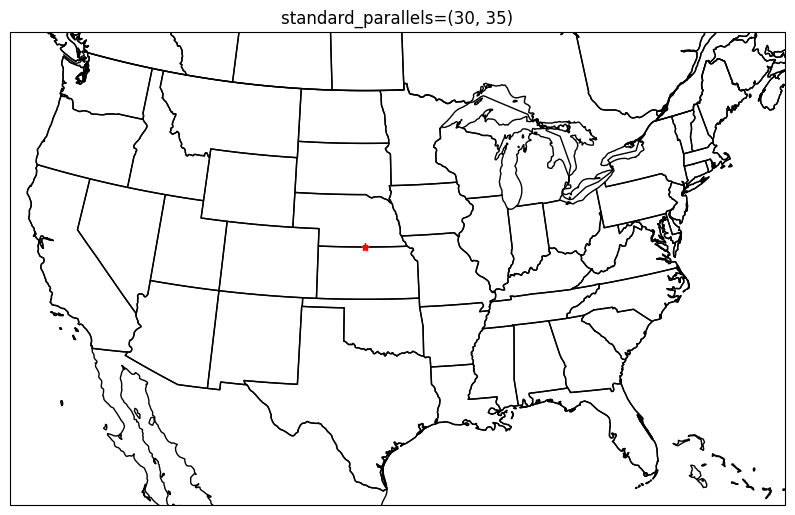

In [21]:
plt.rcParams['figure.figsize'] = 10, 10

#official "center of CONUS"
proj_conus = ccrs.AlbersEqualArea(central_longitude=-98.5, central_latitude=40, standard_parallels=(35, 45))

ax = plt.subplot(1, 1, 1, projection=proj_conus)
ax.set_extent([-120, -73, 22.5, 50])
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.set_title("standard_parallels=(30, 35)")

ax.plot(-88, 40, "r*")

**Your turn**

Try to find and read in data you might use for your project and attempt to display it on a map. What challenges are you having? If you are trying to plot raster data, try:

 ```ax.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree())```

 We will demonstrate this in future chapters. netCDF data can be read in using ```xarray``` and geotiffs can be read in using ```rioxarray```.